# Train and Test the Agent

### If you want to test the agent, you can directly go to the [testing](#Testing:) part and run that cell only.
### <i><u>Caution</u>: Once you start training the agent the learned model is going to be replaced.</i>
---
## Training:

### 1. Installations

__Skip this if these are installed before.__

Run the next code cell to install a few packages.  May take a few minutes.

In [1]:
!pip -q install ./python tqdm

### 2. Loading the Environment for Training

It automatically detects the platform and assigns the right file to the UnityEnvironment. The __assumption__ is that the computer is 64 bit.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import platform

platform_files = {"Windows":r".\Banana_ENVs\Windows\Banana.exe",
                 "Linux":r"./Banana_ENVs/Linux/Banana.x86_64",
                 "Darwin":r"./Banana_ENVs/Mac/Banana.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file, no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Initializing our agent with environment parameters:

In [3]:
from src.agent import Agent
from collections import deque

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# Init the state space and finding its size
state = env_info.vector_observations[0]
state_size = len(state)

# Init our agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### 4. Training our DQN Agent for 1200 Episodes
In 2000 episodes, it converges to a reasonable outcome (+16 average reward).

In [4]:
from src.train import train
scores = train(agent, env, n_episodes=1200)

### 5. Plotting the Scores

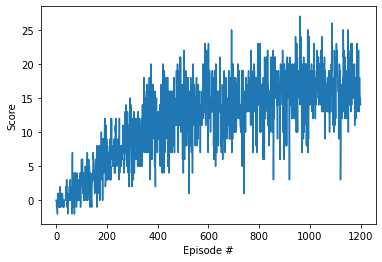

In [5]:
# plot the scores
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()

---
## Testing:

#### Watch a Smart Agent

In [1]:
from src.agent import Agent
from collections import deque
from unityagents import UnityEnvironment
import numpy as np
import torch
import time
import platform

time.sleep(3)

platform_files = {"Windows":r".\Banana_ENVs\Windows\Banana.exe",
                 "Linux":r"./Banana_ENVs/Linux/Banana.x86_64",
                 "Darwin":r"./Banana_ENVs/Mac/Banana.app"}
file = platform_files[platform.system()]
env = UnityEnvironment(file_name=file, seed=0)
print("Environment started ...")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain.brain_name)

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
# number of actions
action_size = brain.vector_action_space_size
# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)

agent = Agent(state_size=state_size, action_size=action_size, seed=0)
print("Agent started ...")

agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
print("Checkpoint loaded ...")

max_t = 5000
for i_episode in range(3):
    # reset the environment
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    for t in range(max_t):
        action = agent.act(state)
        env_info = env.step(action, memory=None)[brain_name]
        next_state, reward, done = env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
        score += reward
        agent.step(state, action, reward, next_state, done)
        state = next_state
        if done:
            break
    print(f"Score:{score}")
time.sleep(5)
env.close() # closing the environment

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environment started ...
BananaBrain
Agent started ...
Checkpoint loaded ...
Score:5.0
Score:2.0
Score:1.0
